<a href="https://colab.research.google.com/github/siddhantpadwal/Credit-Risk-Prediction-Model-for-Loan-Applicants/blob/main/Credit_Risk_Prediction_Model_for_Loan_Applicants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries





In [ ]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300)
plt.style.use('ggplot')

#Data Loading

In [ ]:
df_appln=pd.read_csv('/content/drive/MyDrive/ASGN_STATs/application_data.csv')

**Displaying the first few records(10) from Application Dataset**


In [ ]:
df_appln.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

**Displaying the last few records(10) from Application Dataset**

In [ ]:
df_appln.tail(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307501      456245       0         Cash loans           F            N   
307502      456246       0         Cash loans           F            N   
307503      456247       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307501               Y             3           81000.0    269550.0   
307502               Y             1           94500.0    225000.0   
307503               Y             0          112500.0    345510.0   
307504               Y             0          153000.0    331920.0   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307501      11871.0         225000.0   Unaccompanied  Commercial associate   
307502      10620.0         225000.0   Unaccompanied               Working   
307503      17770.5         247500.0   Unaccompanied  Commercial associate   
307504      16096.5         225000.0   Unaccompanied               Working   
307505      22050.0         225000.0   Unaccompanied             Pensioner   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
307501  Secondary / secondary special               Married   
307502  Secondary / secondary special               Married   
307503               Higher education  Single / not married   
307504  Secondary / secondary special             Separated   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
307501  House / apartment                    0.009175      -12961   
307502  House / apartment                    0.010966      -16063   
307503  House / apartment                    0.022800      -11870   
307504  House / apartment                    0.022625      -16705   
307505  House / apartment                    0.022800      -24384   
307506       With parents                    0.032561       -9327   
307507  House / apartment                    0.025164      -20775   
307508  House / apartment                    0.005002      -14966   
307509  House / apartment                    0.005313      -11961   
307510  House / apartment                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
307501          -1046            -1

**Data Loading of Previous dataset**


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/ASGN_STATs/previous_application.csv')

In [ ]:
df2.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

In [ ]:
df2.tail(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670206     2459206      238591         Cash loans    19401.435   
1670207     1662353      443544         Cash loans    12607.875   
1670208     1556789      209732         Cash loans    22299.390   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670206         180000.0    243936.0               0.0         180000.0   
1670207         112500.0    112500.0               0.0         112500.0   
1670208         315000.0    436216.5               NaN         315000.0   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670206                    TUESDAY                       13   
1670207                     MONDAY                       10   
1670208                   THURSDAY                       17   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1670204                           Y                       1   
1670205                           Y                       1   
1670206                           Y                       1   
1670207                           Y                       1   
1670208                           Y                       1   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1670204                NaN                    NaN                       NaN   
1670205                NaN                    NaN                       NaN   
1670206           0.000000                    NaN                       NaN   
1670207           0.000000                    NaN                       NaN   
1670208                NaN                    NaN                       NaN   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   
1670212                NaN                    NaN                       NaN   
1670213                NaN                    NaN                       NaN   

                   NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670204                               XNA              Refused           -848   
1670205                  

 displaying  the information about the Dataframe dimensions


In [ ]:
df_appln.shape

(307511, 122)

In [ ]:
df_appln.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
df_appln.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

Diplaying the no.of null values present in each columns in application dataset in percentage.


In [ ]:
(df_appln.isnull().sum()/len(df_appln)*100).sort_values(ascending = False).head(50)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [ ]:
null_col=df_appln.isnull().sum().sort_values(ascending=False)
null_col = null_col[null_col.values>(0.35*len(df_appln))]

 Displying Bar Graph for null values which are greater than 35%

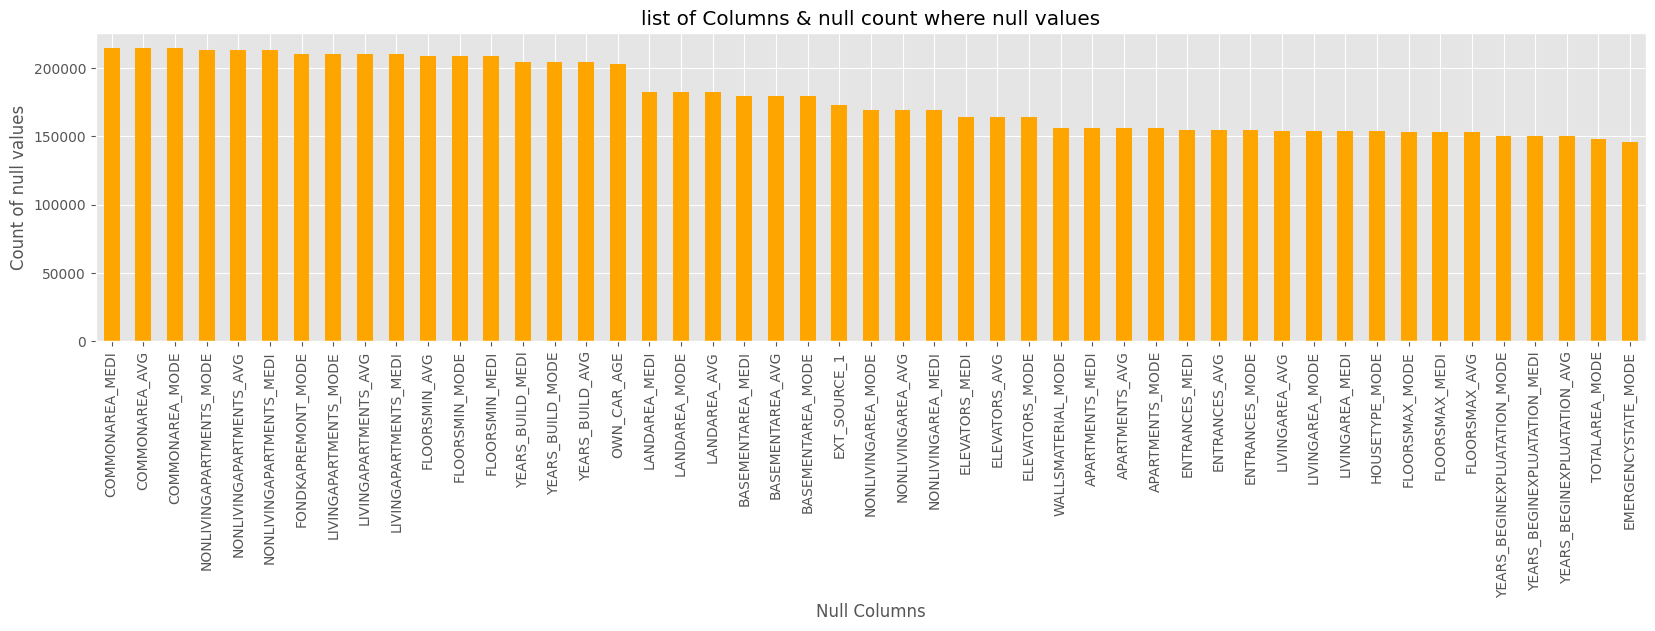

In [ ]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar',color='#FFA500')
plt.title('list of Columns & null count where null values')
plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

 cHECKING No.of columns having percentage of null values greater then 35%

In [ ]:
len(null_col)

49

Now Dropping the Columns that are having null values greater then 35%

In [ ]:
#storing in a new list those columns who are having null values > 35%
label = list(null_col.index.values)



And now dropping those columns

In [ ]:
df_appln.drop(labels=label,axis=1,inplace=True)


Checking the New Dataframe after removing the null values > 35%

In [ ]:
df_appln.shape

(307511, 73)

Checking the percentage of null values for each column again.After removing null values

In [ ]:
null = (df_appln.isnull().sum()/len(df_appln)*100).sort_values(ascending = False).head(50)
null.head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


Now handling these Null values

The strategy used for filling null values , with modes used for attribute/categorical data variables and medians used for continuous data variables . These approaches are common methods for imputing missing data or the null values, providing a way to address gaps in the dataset.

In [ ]:
df_appln.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_appln.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)

df_appln.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_appln.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)

df_appln.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_appln.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True)

df_appln.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_appln.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)

df_appln.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_appln.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True)

df_appln.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_appln.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)

df_appln.NAME_TYPE_SUITE.fillna(df_appln.NAME_TYPE_SUITE.mode()[0],inplace = True)

df_appln.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df_appln.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

df_appln.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df_appln.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

df_appln.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df_appln.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

df_appln.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df_appln.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

df_appln.CNT_FAM_MEMBERS.fillna(df_appln.CNT_FAM_MEMBERS.mode() , inplace = True)

df_appln.DAYS_LAST_PHONE_CHANGE.fillna(df_appln.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True)

df_appln.EXT_SOURCE_2.fillna(df_appln.EXT_SOURCE_2.median() , inplace = True)

df_appln.EXT_SOURCE_3.fillna(df_appln.EXT_SOURCE_3.median() , inplace = True)

In [ ]:
(df_appln.isnull().sum()/len(df_appln)*100).sort_values(ascending=False)


OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

We chose not to fill missing values in the OCCUPATION_TYPE column with the mean or median because preserving the original data ,and Using mean wouldn't make sense in this case.








As You look carefully the table you will find that some columns contains errors.
Like look at thee columns with days it contains negative values

In [ ]:
df_appln.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

NOW let’s make changes accordingly.

storing the columns starting with "DAYS" in a list called "daycl"




In [ ]:
daycl=[i for i in df_appln if i.startswith('DAYS')]
daycl

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

using the abs function to convert negative to positve values.

In [ ]:
df_appln[daycl]= abs(df_appln[daycl])
print(df_appln['DAYS_BIRTH'].unique())
print(df_appln['DAYS_EMPLOYED'].unique())
print(df_appln['DAYS_REGISTRATION'].unique())
print(df_appln['DAYS_ID_PUBLISH'].unique())
print(df_appln['DAYS_LAST_PHONE_CHANGE'].unique())


[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


Now chaning the columns contain Y/N type of values to 1/0.



In [ ]:
df_appln['FLAG_OWN_CAR'] = np.where(df_appln['FLAG_OWN_CAR']=='Y', 1 , 0)
df_appln['FLAG_OWN_REALTY'] = np.where(df_appln['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [ ]:
df_appln.head(30)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0       100002       1         Cash loans           M             0   
1       100003       0         Cash loans           F             0   
2       100004       0    Revolving loans           M             1   
3       100006       0         Cash loans           F             0   
4       100007       0         Cash loans           M             0   
5       100008       0         Cash loans           M             0   
6       100009       0         Cash loans           F             1   
7       100010       0         Cash loans           M             1   
8       100011       0         Cash loans           F             0   
9       100012       0    Revolving loans           M             0   
10      100014       0         Cash loans           F             0   
11      100015       0         Cash loans           F             0   
12      100016       0         Cash loans           F             0   
13      100017       0         Cash loans           M             1   
14      100018       0         Cash loans           F             0   
15      100019       0         Cash loans           M             1   
16      100020       0         Cash loans           M             0   
17      100021       0    Revolving loans           F             0   
18      100022       0    Revolving loans           F             0   
19      100023       0         Cash loans           F             0   
20      100024       0    Revolving loans           M             1   
21      100025       0         Cash loans           F             1   
22      100026       0         Cash loans           F             0   
23      100027       0         Cash loans           F             0   
24      100029       0         Cash loans           M             1   
25      100030       0         Cash loans           F             0   
26      100031       1         Cash loans           F             0   
27      100032       0         Cash loans           M             0   
28      100033       0         Cash loans           M             1   
29      100034       0    Revolving loans           M             0   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 1             0        202500.000    406597.5      24700.5   
1                 0             0        270000.000   1293502.5      35698.5   
2                 1             0         67500.000    135000.0       6750.0   
3                 1             0        135000.000    312682.5      29686.5   
4                 1             0        121500.000    513000.0      21865.5   
5                 1             0         99000.000    490495.5      27517.5   
6                 1             1        171000.000   1560726.0      41301.0   
7                 1             0        360000.000   1530000.0      42075.0   
8                 1             0        112500.000   1019610.0      33826.5   
9                 1             0        135000.000    405000.0      20250.0   
10                1             1        112500.000    652500.0      21177.0   
11                1             0         38419.155    148365.0      10678.5   
12                1             0         67500.000     80865.0       5881.5   
13                0             1        225000.000    918468.0      28966.5   
14                1             0        189000.000    773680.5      32778.0   
15                1             0        157500.000    299772.0      20160.0   
16                0             0        108000.000    509602.5      26149.5   
17                1             1         81000.000    270000.0      13500.0   
18                1             0        112500.000    157500.0       7875.0   
19                1             1         90000.000    544491.0      17563.5   
20                1             0        135000.000    427500.0      21375.0   
21                1             1        2

NOW columns containg 'XNA' values i.e null values ,let change thise accordingly

In [ ]:
df_appln.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

 replacing XNA values  with F value,.because the the most frequently value is'F'.

In [ ]:
df_appln.loc[df_appln.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
df_appln.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Similarly,with ORGANIZATION_TYPE columns also.

In [ ]:
df_appln.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [ ]:
df_appln[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

Here we are imputing null values of OCCUPATION_TYPE with Pensioner as most frequent values for OCCUPATION_TYPE.

In [ ]:
df_appln['ORGANIZATION_TYPE'] = df_appln['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df_appln['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [ ]:
df_appln['AMT_INCOME_TYPE'] = pd.qcut(df_appln.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df_appln['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [ ]:
df_appln['DAYS_BIRTH']= (df_appln['DAYS_BIRTH']/365).astype(int)
df_appln['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [ ]:
df_appln['AGE_GROUP']=pd.cut(df_appln['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
df_appln[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

In [ ]:
df_appln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Changing data types of required column

In [ ]:
df_appln['NAME_CONTRACT_TYPE'] = df_appln['NAME_CONTRACT_TYPE'].astype('category')
df_appln['CODE_GENDER'] = df_appln['CODE_GENDER'].astype('category')
df_appln['NAME_TYPE_SUITE'] = df_appln['NAME_TYPE_SUITE'].astype('category')
df_appln['NAME_INCOME_TYPE'] = df_appln['NAME_INCOME_TYPE'].astype('category')
df_appln['NAME_EDUCATION_TYPE'] = df_appln['NAME_EDUCATION_TYPE'].astype('category')
df_appln['NAME_FAMILY_STATUS'] = df_appln['NAME_FAMILY_STATUS'].astype('category')
df_appln['NAME_HOUSING_TYPE'] = df_appln['NAME_HOUSING_TYPE'].astype('category')
df_appln['OCCUPATION_TYPE'] = df_appln['OCCUPATION_TYPE'].astype('category')
df_appln['WEEKDAY_APPR_PROCESS_START'] = df_appln['WEEKDAY_APPR_PROCESS_START'].astype('category')
df_appln['ORGANIZATION_TYPE'] = df_appln['ORGANIZATION_TYPE'].astype('category')

Ahter seing all the Column there are some columns which do not add value to our analysis ,so dropping them.

In [ ]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_appln.drop(labels=unwanted,axis=1,inplace=True)

#Outlier Analysis

Outlier detection for any data science process is very important. Sometimes removing outliers tend to improve our model meanwhile sometimes outliers may give you a very different approach to your analysis.

finding numerical columns

In [ ]:
numerical_col = df_appln.select_dtypes(include='number').columns
len(numerical_col)

35

<Figure size 2000x5000 with 0 Axes>

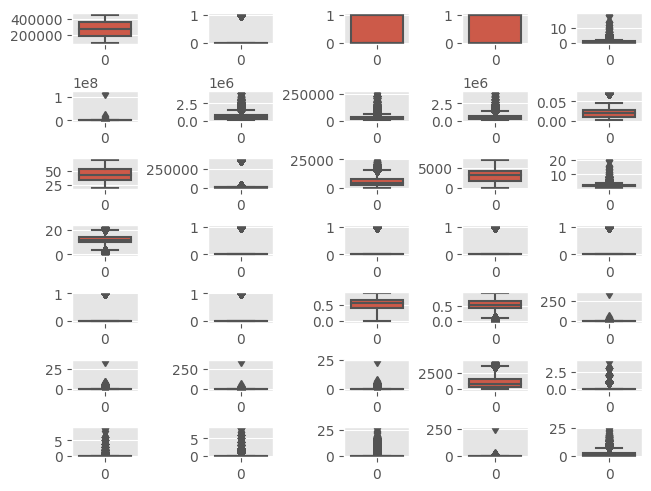

In [ ]:
plt.figure(figsize=(20, 50))
fig, axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=10, hspace=15)
for ax, column in zip(axes.flatten(),numerical_col):
    sns.boxplot(df_appln[column],ax=ax)

Checking weather the data is  imbalaced or not

In [ ]:
Target0 = df_appln.loc[df_appln["TARGET"]==0]
Target1 = df_appln.loc[df_appln["TARGET"]==1]

Calculating imbalance percentage

In [ ]:
round(len(Target0)/len(Target1),2)

11.39

11.39 % of data is imbalanced, to visualize distribution of the target
variable, pie chart needs to be plot

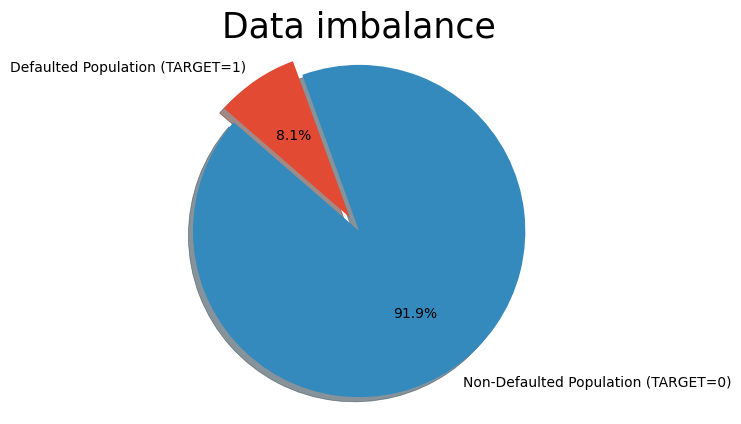

In [ ]:
count1 = 0
count0 = 0
for i in df_appln['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df_appln['TARGET']))*100
count0 = (count0/len(df_appln['TARGET']))*100

x = ['Defaulted Population (TARGET=1)', 'Non-Defaulted Population (TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance', fontsize=25)
plt.show()



df1 dataframe that is application data is highly imbalanced. Defaulted population is 8.1 % and non- defaulted population is 91.9% .Ratio is 11.3

Seperately analyzing data based on target vaariable


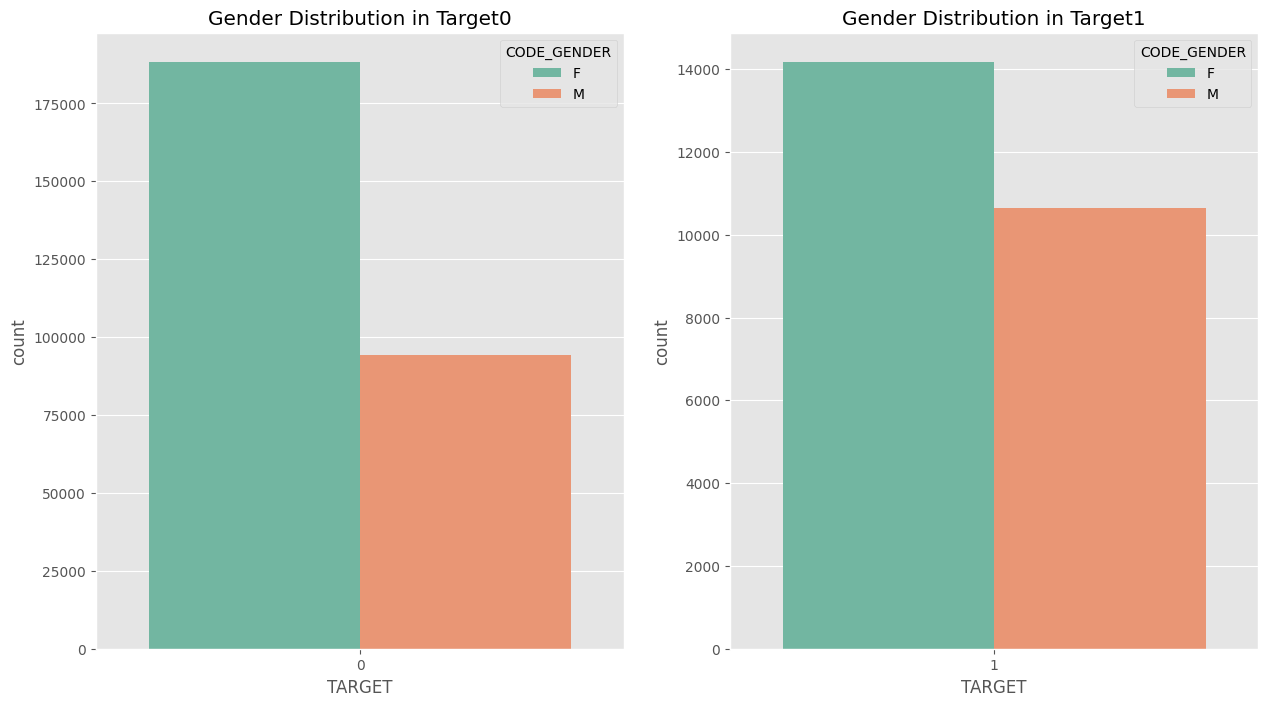

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

from the above code, we can visualise that the amount of female clients who applied for loan were more than the male clients

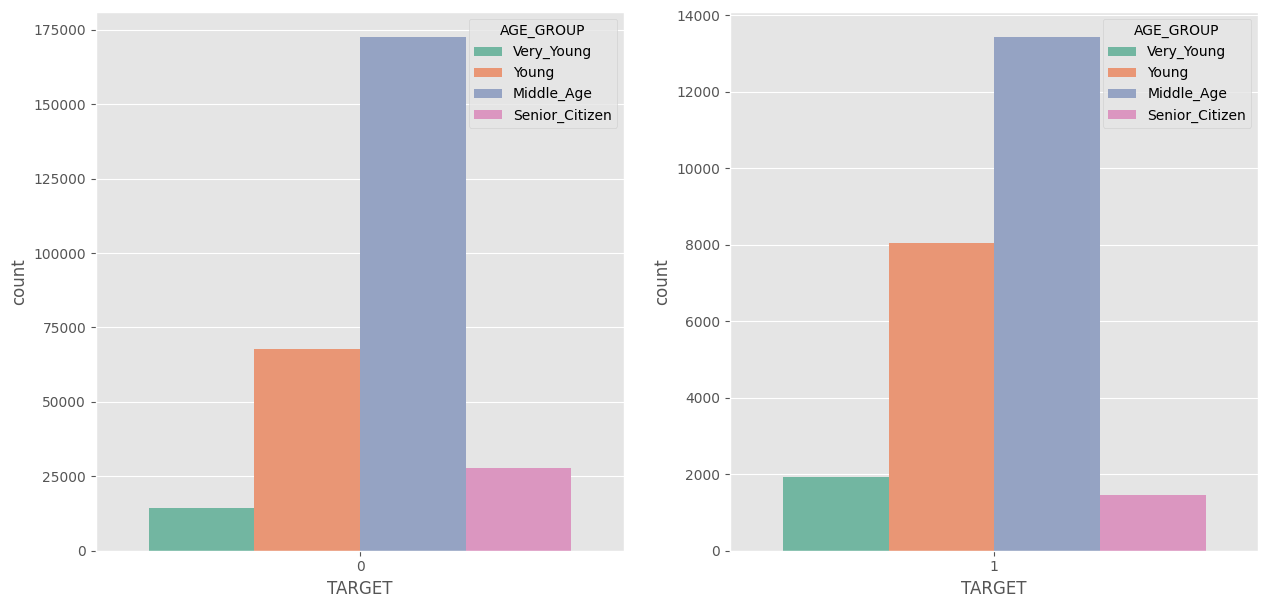

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

Looking at the above graph, we can say that the group of middle age have applied for loan more than compared to other age groups.

<Figure size 4000x500 with 0 Axes>

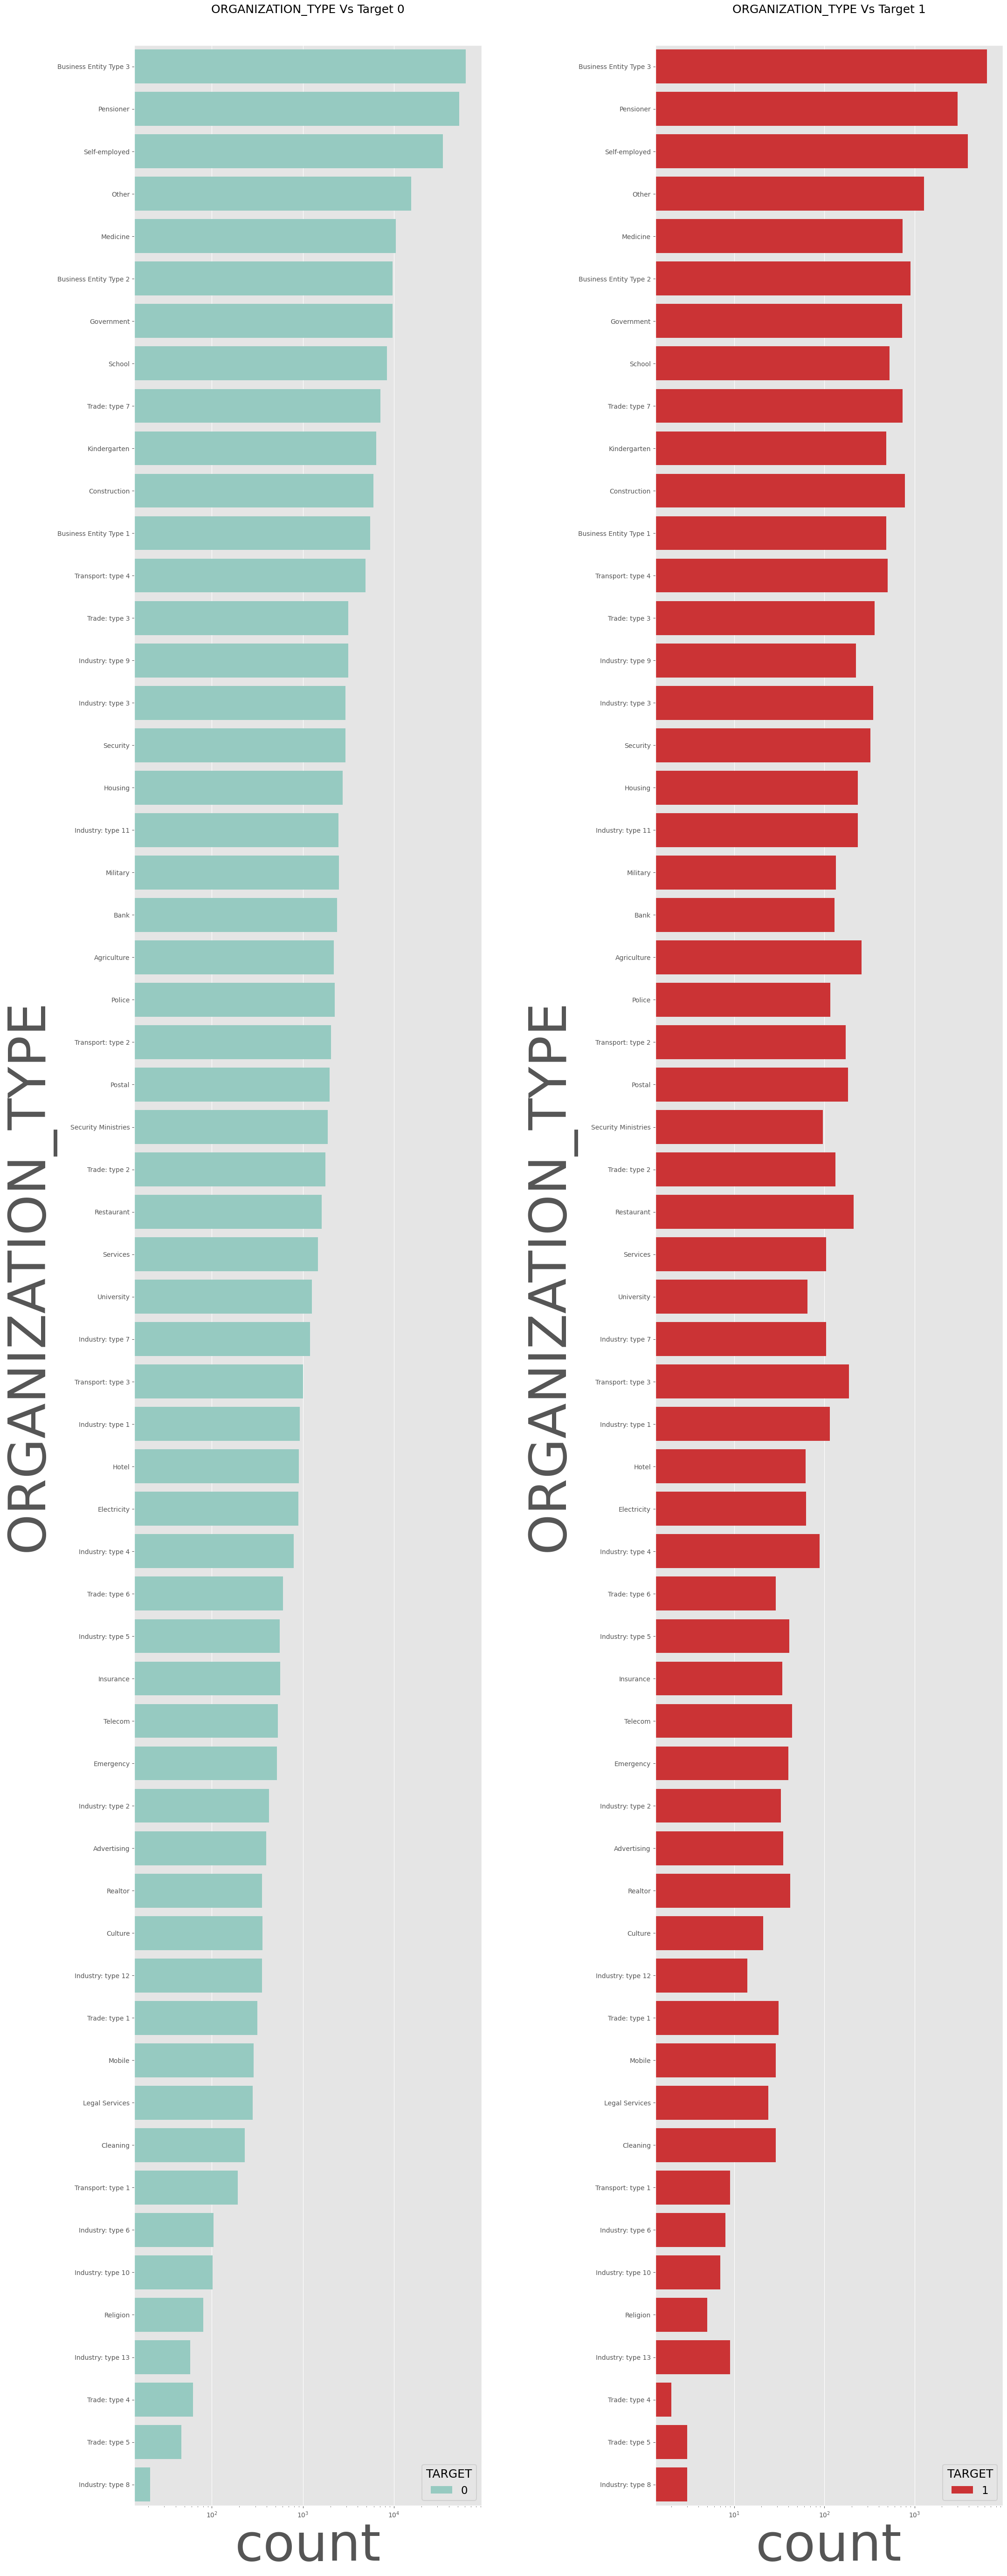

In [ ]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3)

plt.subplot(121)
plt.xscale('log')                                                                             # For Target0
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',order=df_appln['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")

plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',order=df_appln['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")

plt.show();

From the above graph, we can analyse that the cients with the Organisation_type usiness Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 have applied for loan at a higher rate as compared to other categories

# Previous Application DataFrame i.e (Dataframe 2nd)

In [ ]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
df2.shape

(1670214, 37)

In [ ]:
(df2.isnull().sum()/len(df2)*100).sort_values(ascending = False).head(50)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [ ]:
nul_col = df2.isnull().sum().sort_values(ascending = False)
nul_col = nul_col[nul_col.values >(0.35*len(df2))]

Making list of column names having null values greater than 35%

And Droping those columns

In [ ]:
label = list(nul_col.index.values)
df2.drop(labels = label,axis=1,inplace = True)

In [ ]:
df2.shape

(1670214, 26)

In [ ]:
nul = (df2.isnull().sum()/len(df2)*100).sort_values(ascending = False).head(20)

In [ ]:
nul.head(20)

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
CODE_REJECT_REASON         0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_PREV                 0.000000
NAME_PAYMENT_TYPE          0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
NFLAG_LAST_APPL_IN_DAY     0.000000
dtype: float64

In [ ]:
duplicate_rows_df = df2[df2.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 26)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [ ]:
df2.AMT_GOODS_PRICE.fillna(df2.AMT_GOODS_PRICE.median(),inplace = True)

df2.AMT_ANNUITY.fillna(df2.AMT_ANNUITY.mode()[0],inplace = True)

df2.CNT_PAYMENT.fillna(df2.CNT_PAYMENT.mode()[0],inplace = True)

In [ ]:
(df2.isnull().sum()/len(df_appln)*100)

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000325
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


In [ ]:
df2.head(20)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
1      2802425      108129         Cash loans    25188.615         607500.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
3      2819243      176158         Cash loans    47041.335         450000.0   
4      1784265      202054         Cash loans    31924.395         337500.0   
5      1383531      199383         Cash loans    23703.930         315000.0   
6      2315218      175704         Cash loans     2250.000              0.0   
7      1656711      296299         Cash loans     2250.000              0.0   
8      2367563      342292         Cash loans     2250.000              0.0   
9      2579447      334349         Cash loans     2250.000              0.0   
10     1715995      447712         Cash loans    11368.620         270000.0   
11     2257824      161140         Cash loans    13832.775         211500.0   
12     2330894      258628         Cash loans    12165.210         148500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   
16     2163253      154602     Consumer loans     4187.340          26955.0   
17     1285768      142748    Revolving loans     9000.000         180000.0   
18     2393109      396305         Cash loans    10181.700         180000.0   
19     1173070      199178         Cash loans     4666.500          45000.0   

    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0      17145.0          17145.0                   SATURDAY   
1     679671.0         607500.0                   THURSDAY   
2     136444.5         112500.0                    TUESDAY   
3     470790.0         450000.0                     MONDAY   
4     404055.0         337500.0                   THURSDAY   
5     340573.5         315000.0                   SATURDAY   
6          0.0         112320.0                    TUESDAY   
7          0.0         112320.0                     MONDAY   
8          0.0         112320.0                     MONDAY   
9          0.0         112320.0                   SATURDAY   
10    335754.0         270000.0                     FRIDAY   
11    246397.5         211500.0                     FRIDAY   
12    174361.5         148500.0                    TUESDAY   
13     57564.0          53779.5                     SUNDAY   
14     27252.0          26550.0                   SATURDAY   
15    119853.0         126490.5                    TUESDAY   
16     27297.0          26955.0                   SATURDAY   
17    180000.0         180000.0                     FRIDAY   
18    180000.0         180000.0                   THURSDAY   
19     49455.0          45000.0                   SATURDAY   

    HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                        15                           Y   
1                        11                           Y   
2                        11                           Y   
3                         7                           Y   
4                         9                           Y   
5                         8                           Y   
6                        11                           Y   
7                         7                           Y   
8                        15                           Y   
9                        15                           Y   
10                        7                           Y   
11                       10                           Y   
12                       15                           Y   
13                       15                           Y   
14                       10                           Y   
15                        7                           Y   
16                       12           

Removing XNA and XAP values from column

In [ ]:
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [ ]:
df2.shape

(69635, 26)

In [ ]:
df_appln.shape

(307511, 47)

Merging of two dataframe

In [ ]:
df=pd.merge(left=df_appln,right=df2,how='inner',on='SK_ID_CURR',suffixes='_x')

In [ ]:
df.shape

(59413, 72)

In [ ]:
df.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE_     0
CODE_GENDER             0
FLAG_OWN_CAR            0
                       ..
SELLERPLACE_AREA        0
NAME_SELLER_INDUSTRY    0
CNT_PAYMENT             0
NAME_YIELD_GROUP        0
PRODUCT_COMBINATION     0
Length: 72, dtype: int64

In [ ]:
(df.isnull().sum()/len(df)*100)

SK_ID_CURR              0.0
TARGET                  0.0
NAME_CONTRACT_TYPE_     0.0
CODE_GENDER             0.0
FLAG_OWN_CAR            0.0
                       ... 
SELLERPLACE_AREA        0.0
NAME_SELLER_INDUSTRY    0.0
CNT_PAYMENT             0.0
NAME_YIELD_GROUP        0.0
PRODUCT_COMBINATION     0.0
Length: 72, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   59413 non-null  int64   
 1   TARGET                       59413 non-null  int64   
 2   NAME_CONTRACT_TYPE_          59413 non-null  category
 3   CODE_GENDER                  59413 non-null  category
 4   FLAG_OWN_CAR                 59413 non-null  int64   
 5   FLAG_OWN_REALTY              59413 non-null  int64   
 6   CNT_CHILDREN                 59413 non-null  int64   
 7   AMT_INCOME_TOTAL             59413 non-null  float64 
 8   AMT_CREDIT_                  59413 non-null  float64 
 9   AMT_ANNUITY_                 59406 non-null  float64 
 10  AMT_GOODS_PRICE_             59354 non-null  float64 
 11  NAME_TYPE_SUITE              59413 non-null  category
 12  NAME_INCOME_TYPE             59413 non-null  category
 13  N

In [ ]:
df. AMT_GOODS_PRICE_.fillna(df.EXT_SOURCE_2.median() , inplace = True)

df.AMT_GOODS_PRICE_.fillna(df.EXT_SOURCE_3.median() , inplace = True)

In [ ]:
(df.isnull().sum()/len(df)*100)

SK_ID_CURR              0.0
TARGET                  0.0
NAME_CONTRACT_TYPE_     0.0
CODE_GENDER             0.0
FLAG_OWN_CAR            0.0
                       ... 
SELLERPLACE_AREA        0.0
NAME_SELLER_INDUSTRY    0.0
CNT_PAYMENT             0.0
NAME_YIELD_GROUP        0.0
PRODUCT_COMBINATION     0.0
Length: 72, dtype: float64

In [ ]:
df.dtypes

SK_ID_CURR                 int64
TARGET                     int64
NAME_CONTRACT_TYPE_     category
CODE_GENDER             category
FLAG_OWN_CAR               int64
                          ...   
SELLERPLACE_AREA           int64
NAME_SELLER_INDUSTRY      object
CNT_PAYMENT              float64
NAME_YIELD_GROUP          object
PRODUCT_COMBINATION       object
Length: 72, dtype: object

In [ ]:
df = df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY','WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV','AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of NAME_CLIENT_TYPE","Percentage of NAME_CONTRACT_STATUS"),specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = df['NAME_CLIENT_TYPE'].value_counts().index.to_list(),values = df['NAME_CLIENT_TYPE'].value_counts().to_list() ,textinfo='label+percent'),1, 1)

fig.add_trace(go.Pie(labels = df['NAME_CONTRACT_STATUS'].value_counts().index.to_list(), values = df['NAME_CONTRACT_STATUS'].value_counts().to_list(), textinfo='label+percent'),1, 2)

fig.update_traces(hole=.4,showlegend=False)

fig.show()

Pie plot shows that in case of NAME_CLIENT_TYPE, there are 80.7% of clients who are repeaters, 14.5% new clients for loan and for the NAME_CONTRACT_STATUS, 38.8% of client's loans were approved and 58.5% client's loans were refused and 0.308% of the loans were unused and 2.3% cancelled.

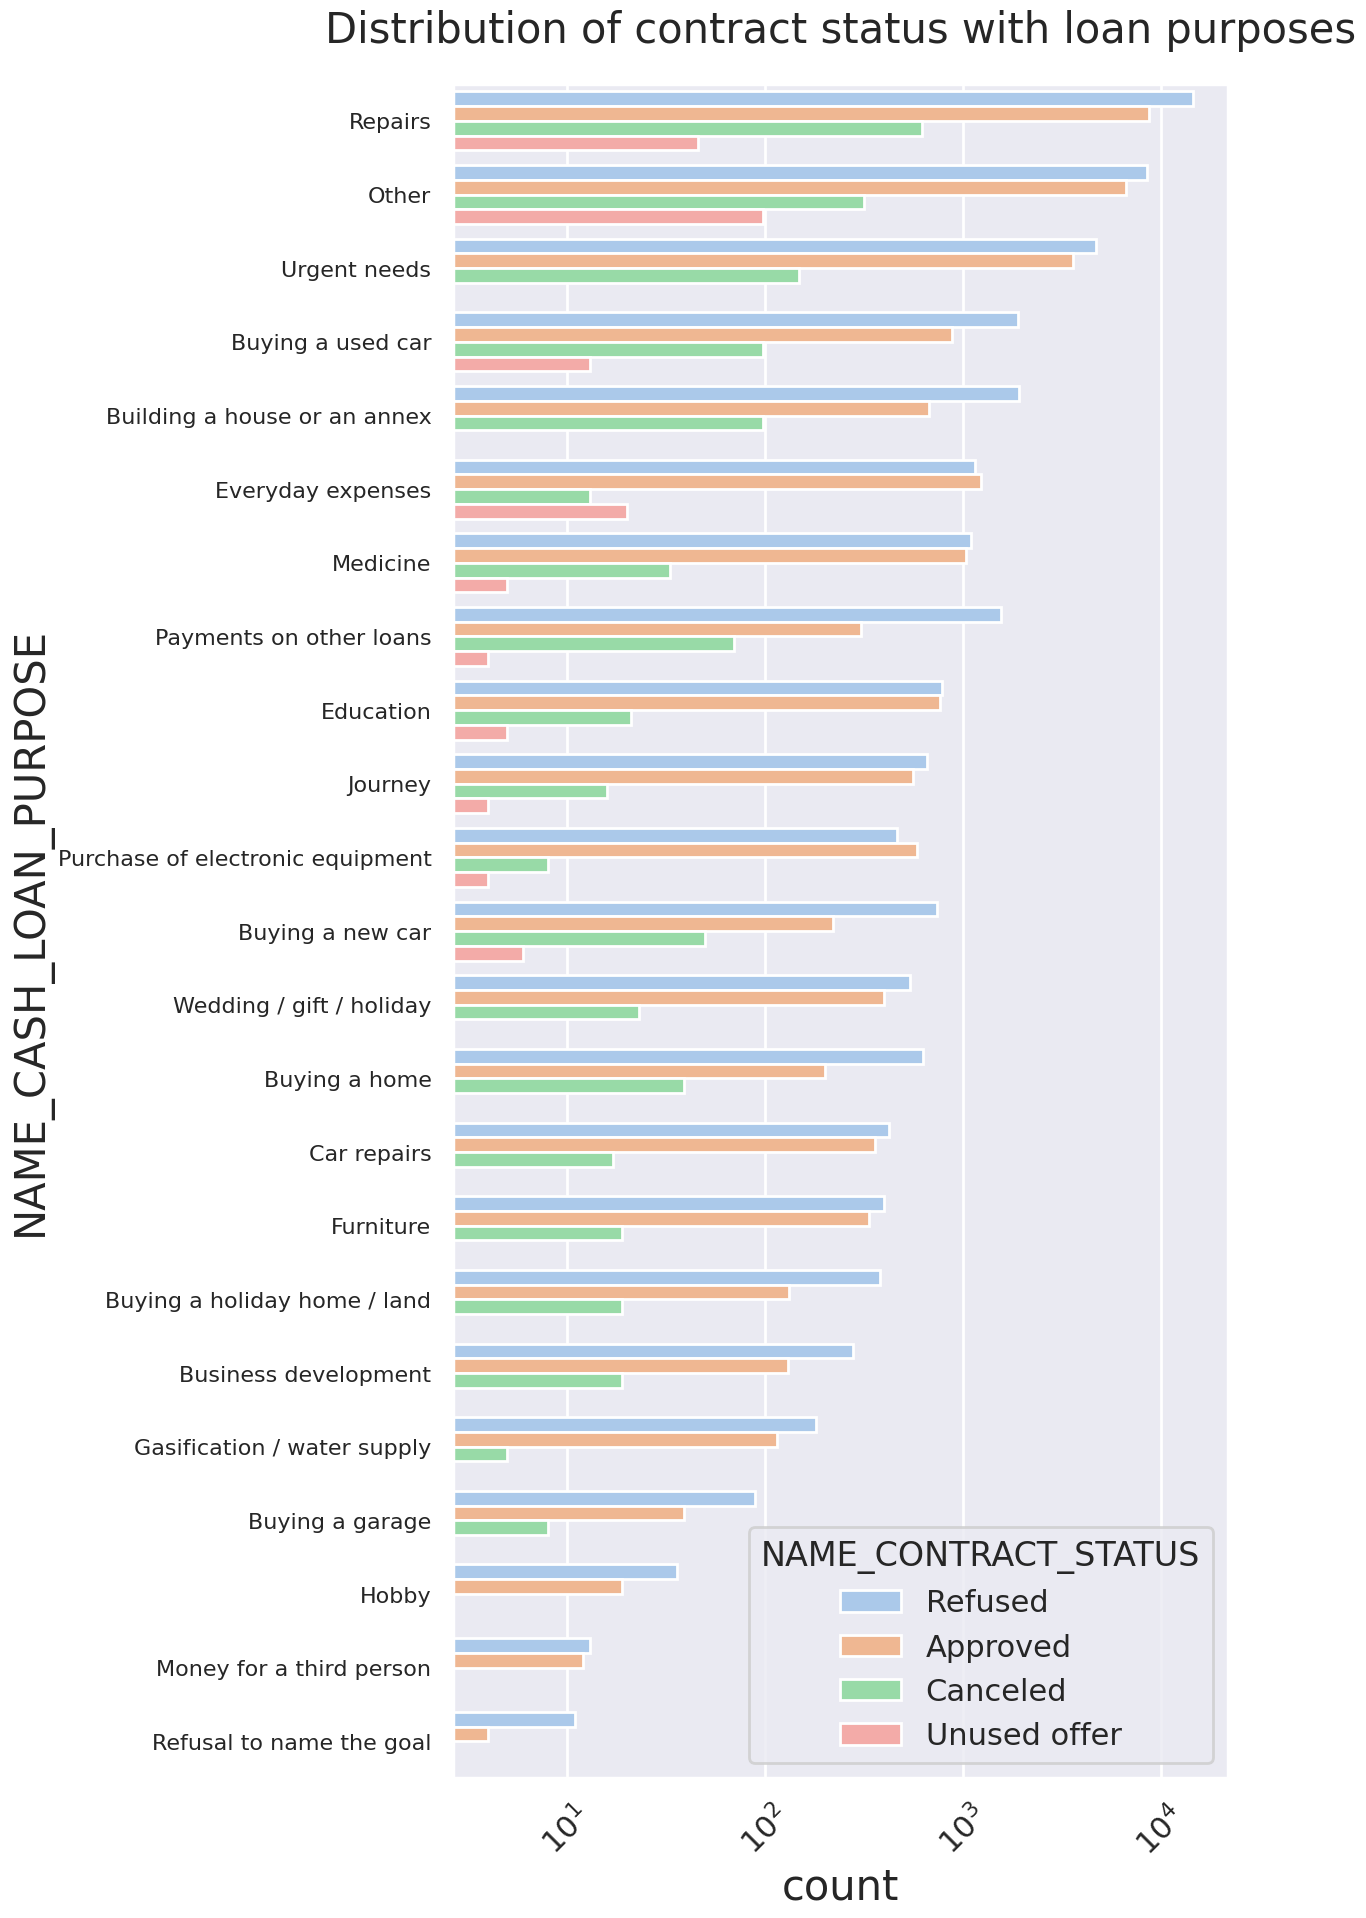

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')

ax = sns.countplot(data = df2, y= 'NAME_CASH_LOAN_PURPOSE', order=df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

above chart shows most of the loans came from the purpose repairs, for education and medicine purpose there were equal number of rejection and approvals and for the paying other loans and buying a new car have the maximum number of rejections.

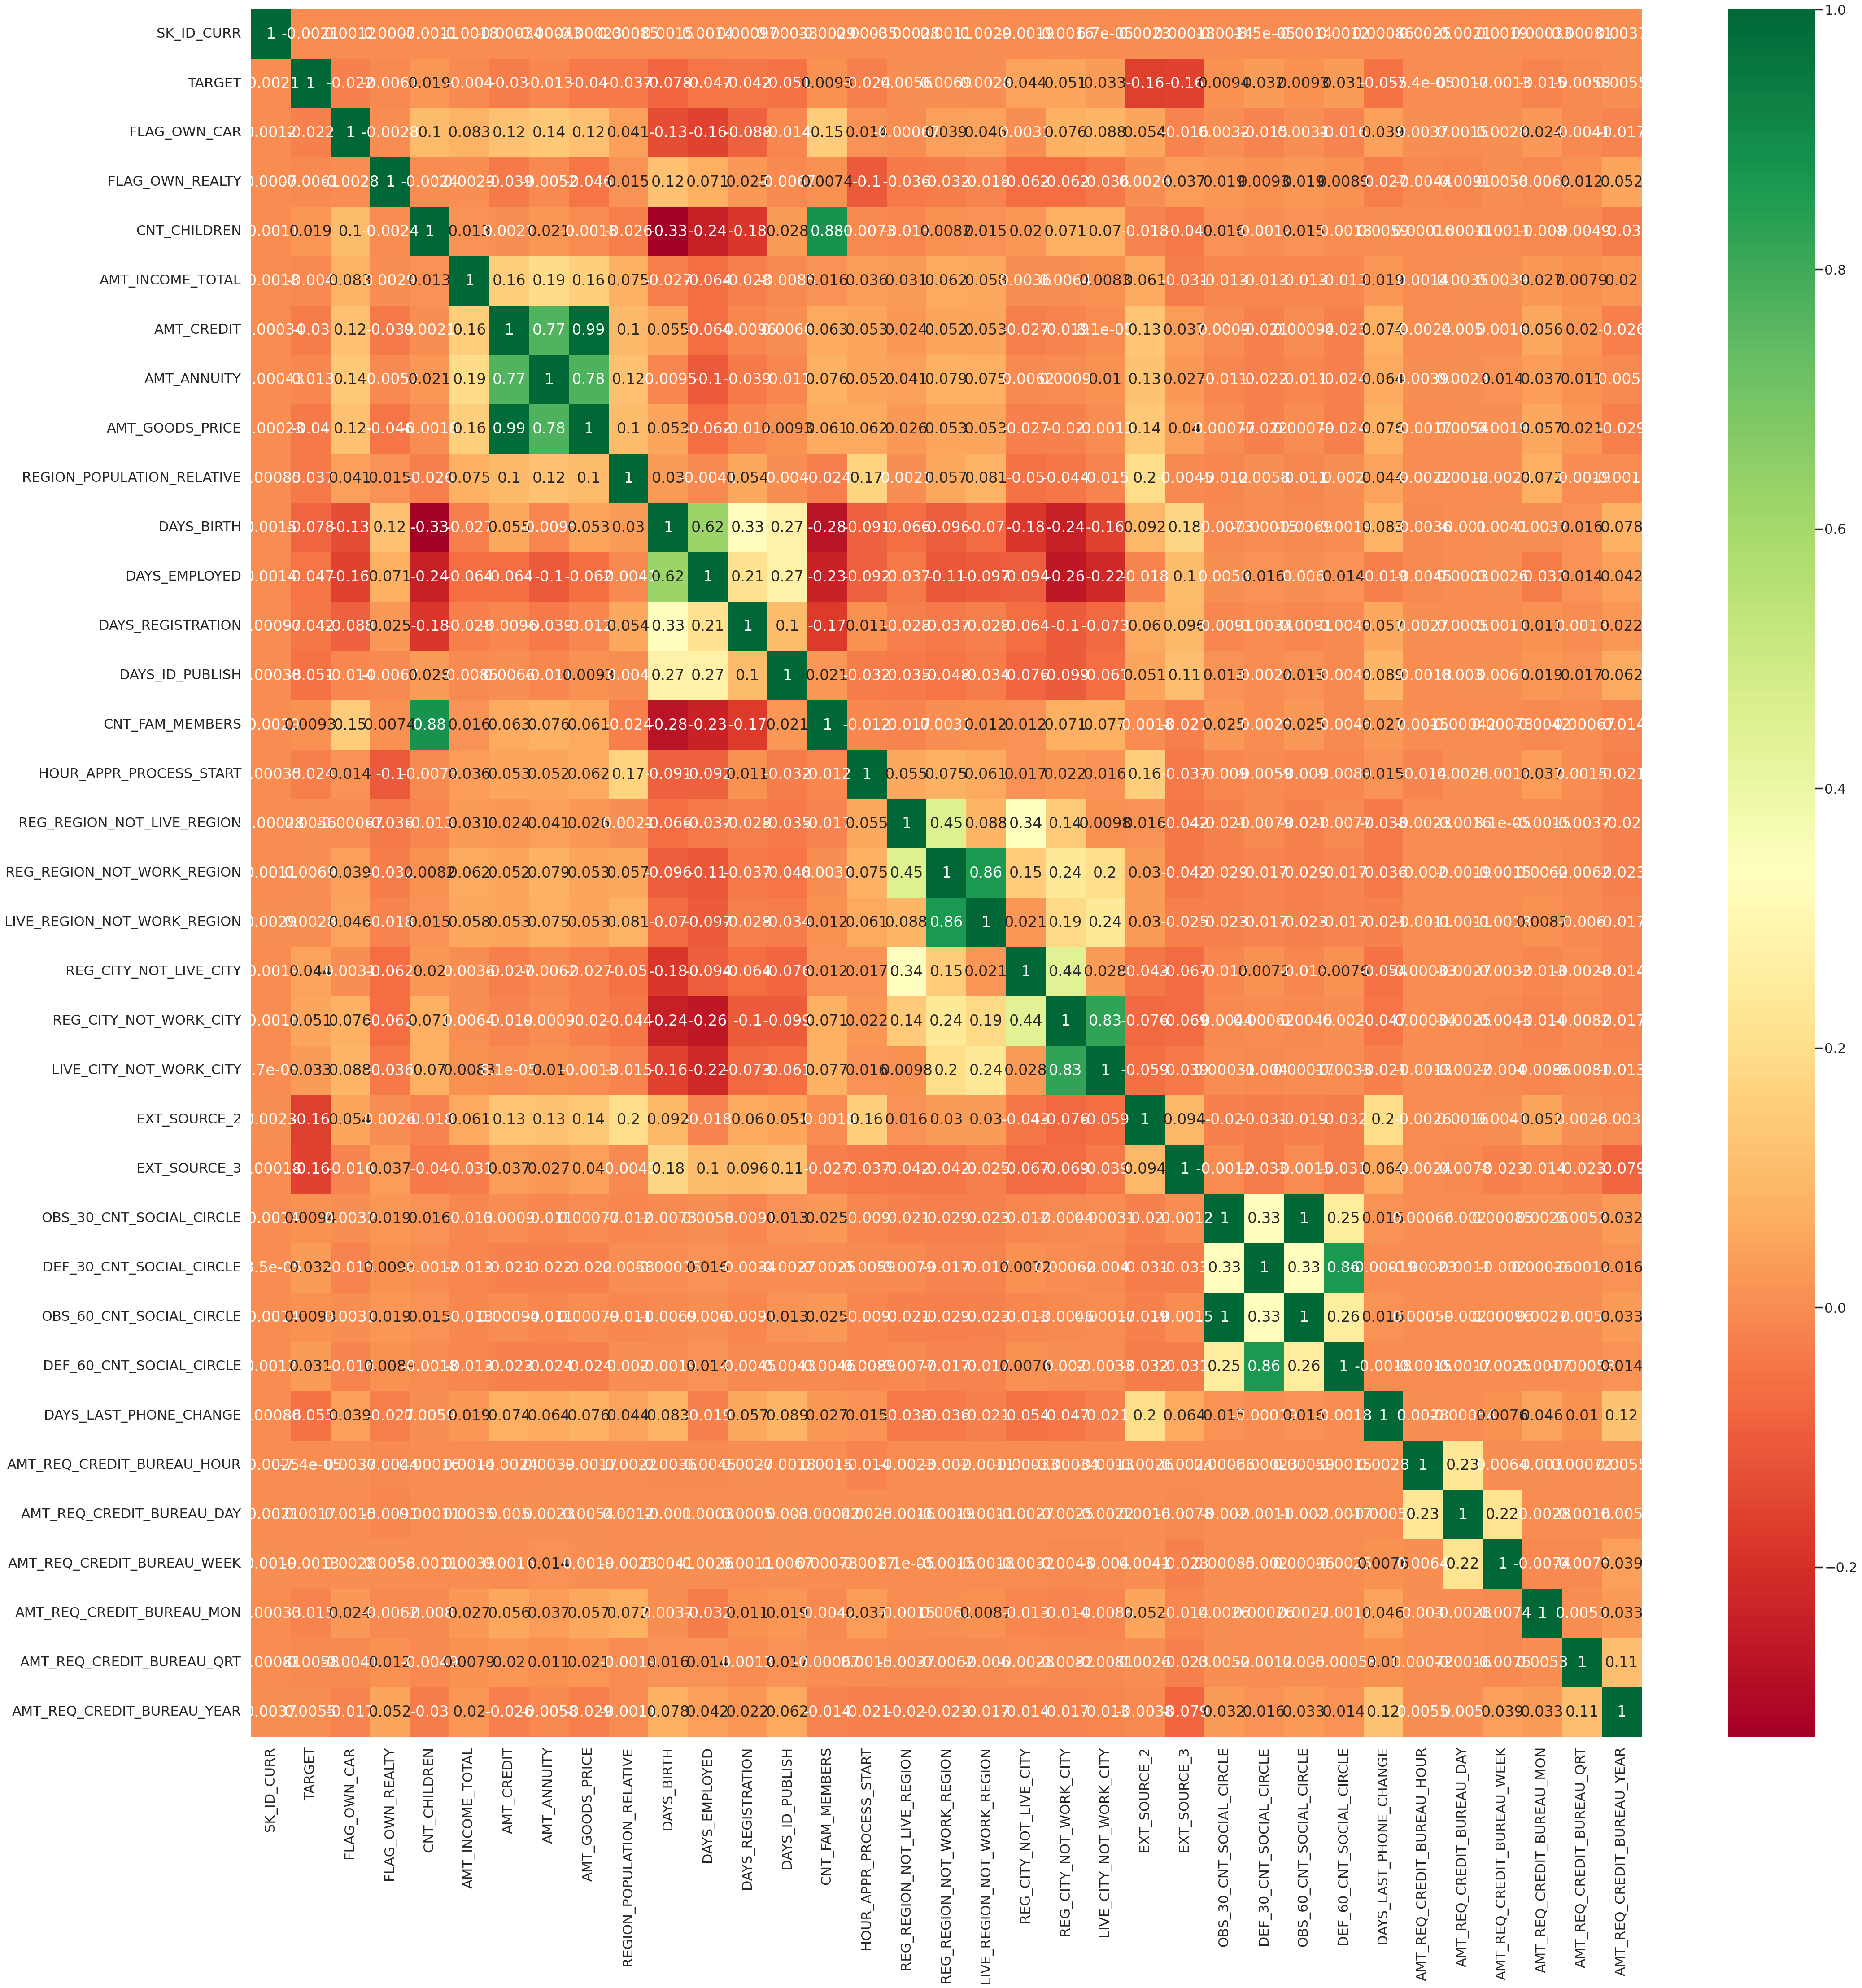

In [ ]:
plt.figure(figsize=(50,50))
plt.show(sns.heatmap(df_appln.corr(), cmap='RdYlGn', annot=True))

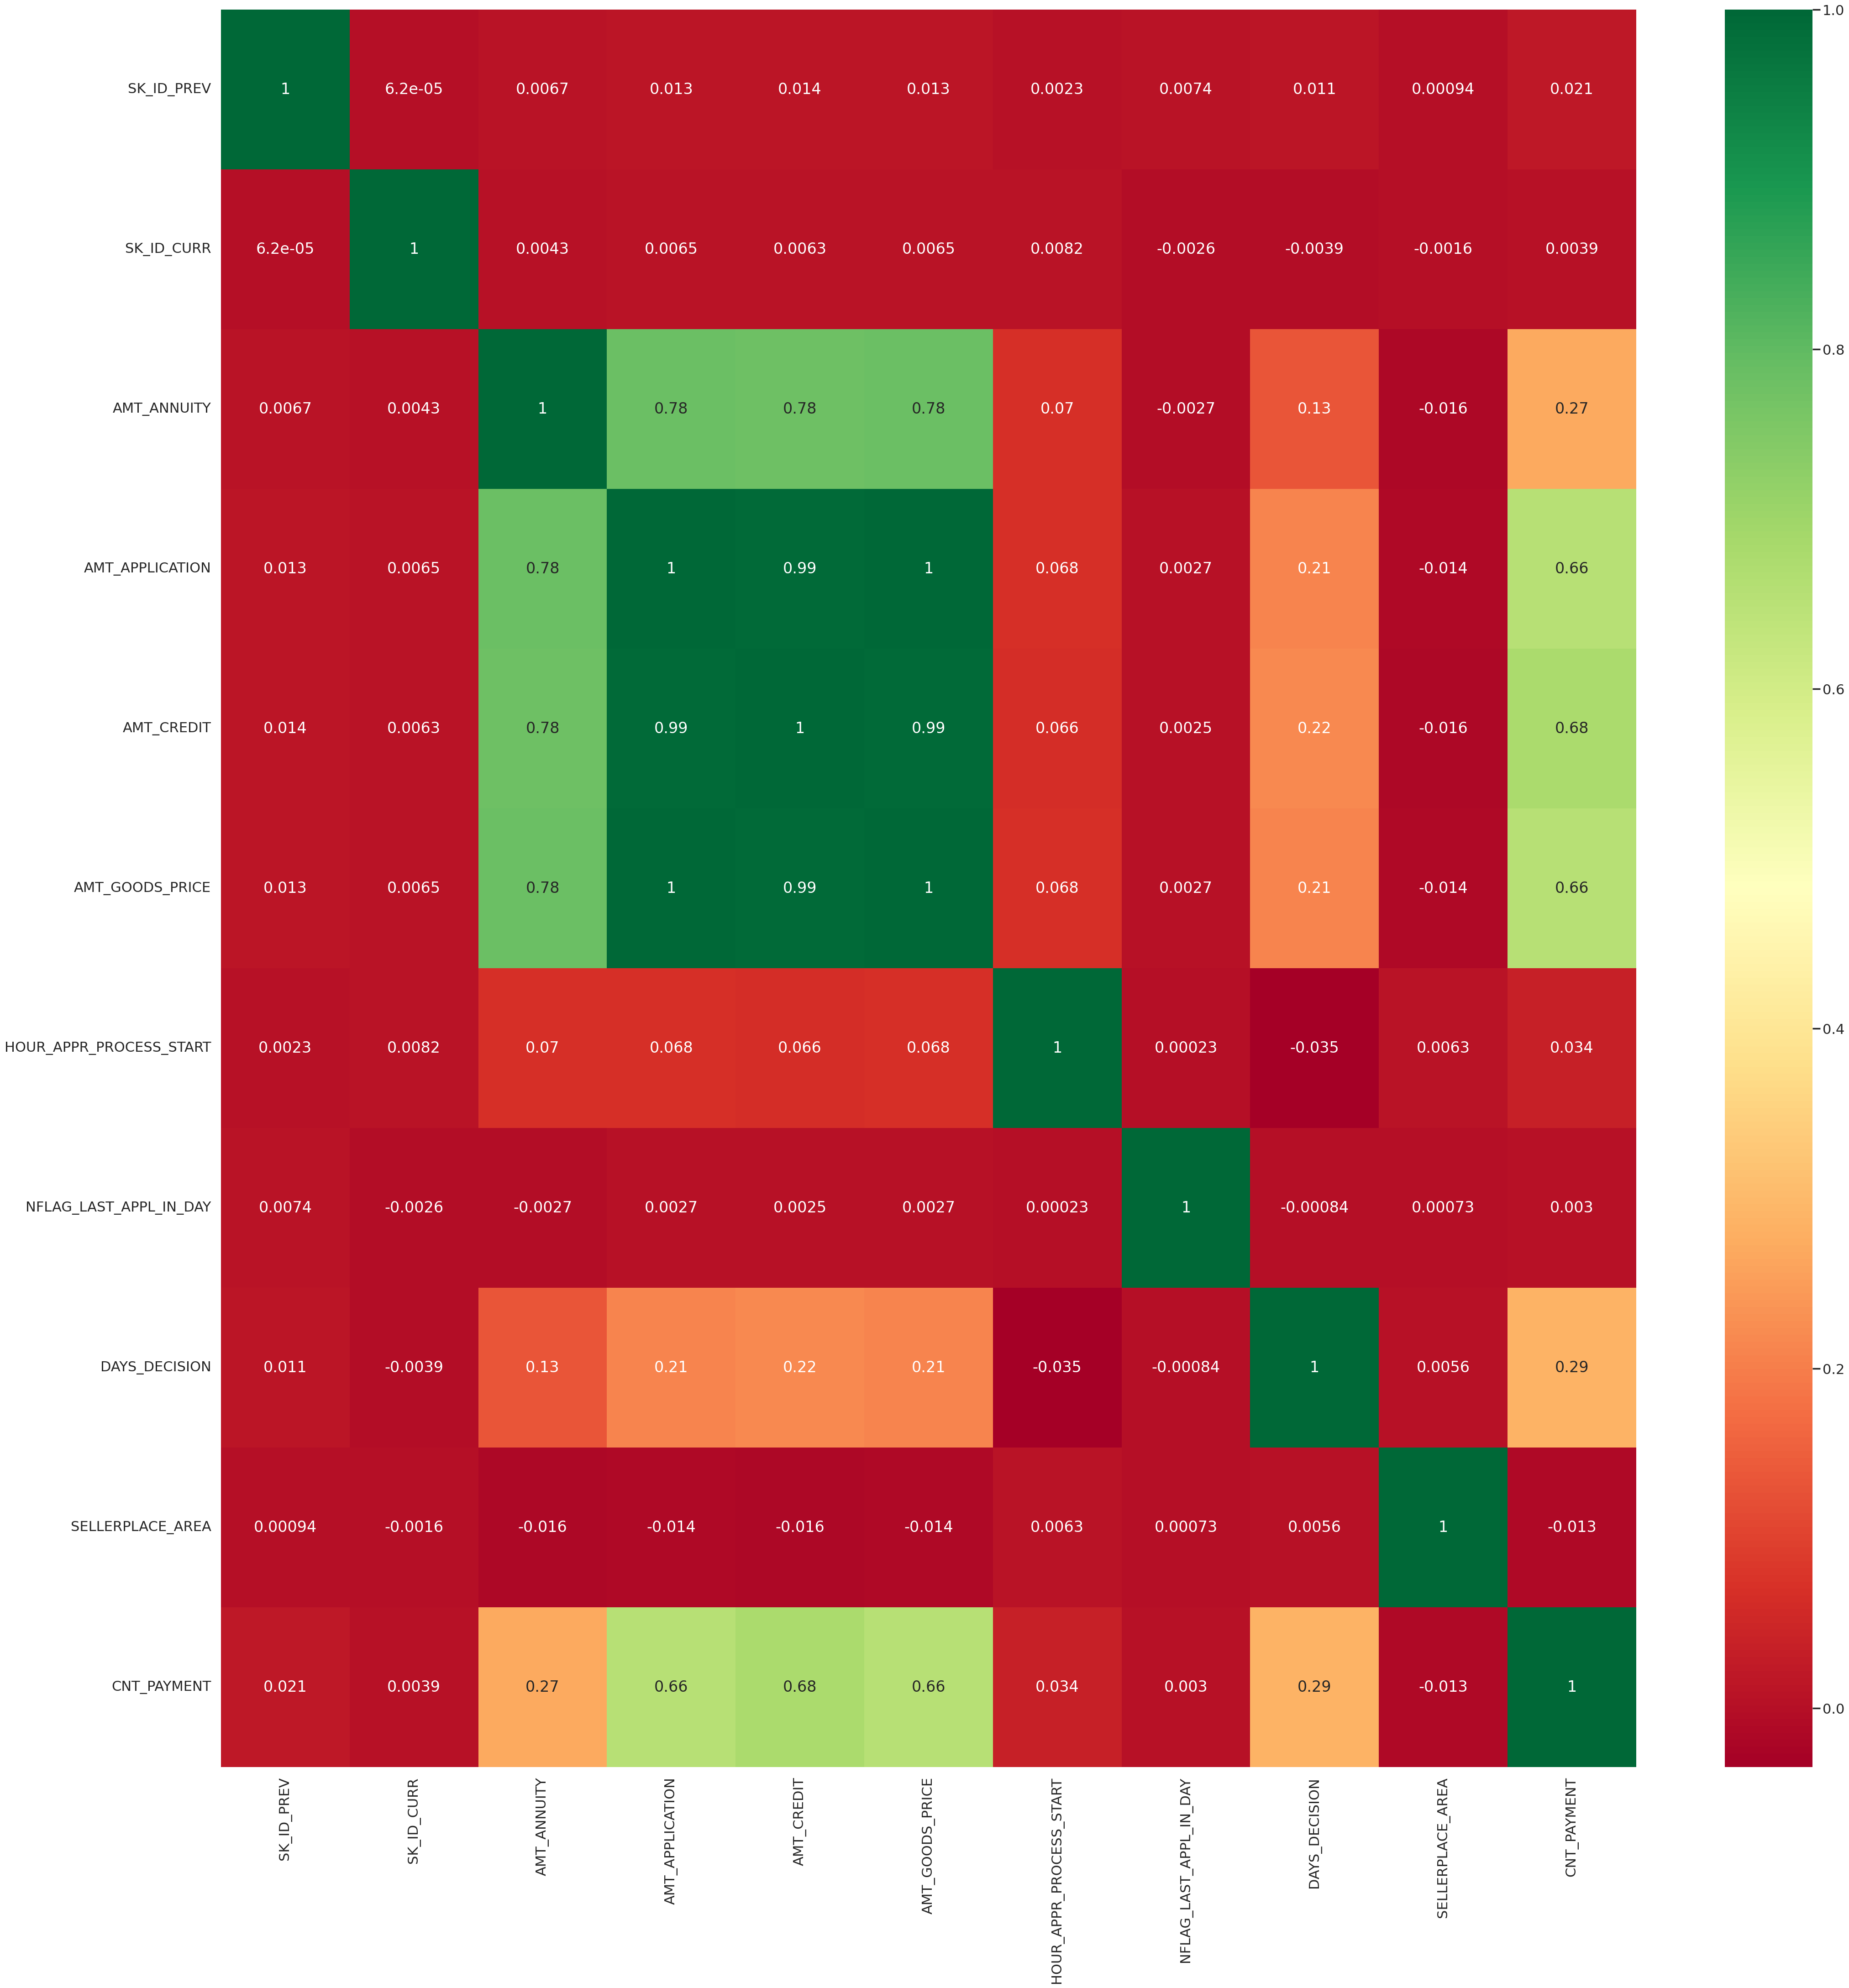

In [ ]:
plt.figure(figsize=(50,50))
plt.show(sns.heatmap(df2.corr(), cmap='RdYlGn', annot=True))

In [ ]:
plt.figure(figsize=(100,100))
plt.show(sns.heatmap(df.corr(), cmap='RdYlGn', annot=True))

# Now Model Creation

In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import norm,t,chi2,chi2_contingency,chisquare
import matplotlib
from matplotlib import pyplot as plt
import pylab

import statsmodels
from statsmodels import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Model Development: Build a model to predict credit risk using statistical or machine learning techniques.


Model Validation and Optimization: Validate and optimize the model for accuracy and reliability.



In [ ]:
corr_matrix=df.corr()

In [ ]:
print(corr_matrix["TARGET"].sort_values(ascending=False))

TARGET                          1.000000
DAYS_DECISION                   0.062798
REG_CITY_NOT_WORK_CITY          0.055660
LIVE_CITY_NOT_WORK_CITY         0.041623
REG_CITY_NOT_LIVE_CITY          0.039054
CNT_PAYMENT                     0.030572
CNT_CHILDREN                    0.026986
OBS_30_CNT_SOCIAL_CIRCLE        0.026563
OBS_60_CNT_SOCIAL_CIRCLE        0.026209
CNT_FAM_MEMBERS                 0.025199
DEF_30_CNT_SOCIAL_CIRCLE        0.024675
DEF_60_CNT_SOCIAL_CIRCLE        0.021117
SELLERPLACE_AREA                0.020981
LIVE_REGION_NOT_WORK_REGION     0.006229
REG_REGION_NOT_WORK_REGION      0.005917
AMT_REQ_CREDIT_BUREAU_QRT       0.005153
AMT_REQ_CREDIT_BUREAU_DAY       0.004066
AMT_REQ_CREDIT_BUREAU_HOUR      0.000175
NFLAG_LAST_APPL_IN_DAY         -0.000161
AMT_REQ_CREDIT_BUREAU_WEEK     -0.003909
AMT_ANNUITY                    -0.003963
SK_ID_PREV                     -0.004207
REG_REGION_NOT_LIVE_REGION     -0.004221
SK_ID_CURR                     -0.004885
FLAG_OWN_REALTY 

Problem Statement 1: Loan Preferences: Segment customers based on their loan preferences, considering factors like loan amount, term, type, and interest rates. Repayment History: Further segment these groups based on their repayment history, such as timely payments, late payments, or defaults.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE']
X = df[features]
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10358
           1       0.40      0.01      0.02      1525

    accuracy                           0.87     11883
   macro avg       0.63      0.50      0.48     11883
weighted avg       0.81      0.87      0.81     11883



In [ ]:
df.shape

(59413, 72)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make prmodel.fit(X_train, y_train)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Test ROC-AUC score: {roc_auc}')

Accuracy: 0.8743583270217958
Test ROC-AUC score: 0.5208368917349068


Conclusion for Problem Statement 1: From the above 2 models, we can conclude that Random Forest has higher accuracy than Gradient Descent proving it to be the better model.

Problem Statement 2: Risk Assessment: Evaluate and quantify the risk associated with each loan applicant using the model. Approval Strategy Development: Develop strategies to balance risk minimization with approving a high number of safe loans

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score
from math import sqrt

features = ["DAYS_DECISION", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",
"CNT_PAYMENT", "CNT_CHILDREN", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "CNT_FAM_MEMBERS",
"DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "SELLERPLACE_AREA", "AMT_REQ_CREDIT_BUREAU_YEAR",
"AMT_CREDIT_PREV", "AMT_INCOME_TOTAL", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_CREDIT", "AMT_APPLICATION",
"AMT_GOODS_PRICEx", "HOUR_APPR_PROCESS_START_PREV", "HOUR_APPR_PROCESS_START", "AMT_GOODS_PRICE_",
"AMT_ANNUITY_PREV", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "REGION_POPULATION_RELATIVE",
"DAYS_BIRTH", "DAYS_LAST_PHONE_CHANGE", "EXT_SOURCE_2", "EXT_SOURCE_3"]

X = df[features]
y = df['TARGET']
model = RandomForestClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Test ROC-AUC score: {roc_auc}')
risk_threshold = 0.5
approved_loans = X_test[y_pred <= risk_threshold]


rmse1 = sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE score: {rmse1}')

Test ROC-AUC score: 0.907988503382196
Test RMSE score: 0.24539309951498908


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE']
X = df[features]
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10358
           1       0.40      0.01      0.02      1525

    accuracy                           0.87     11883
   macro avg       0.63      0.50      0.48     11883
weighted avg       0.81      0.87      0.81     11883



Conclusion for Problem Statement 2: From the above 2 models, we can conclude that Random Forest has higher accuracy than Logistic Regression proving it to be the better model.